# Abalone Case Study¶
Problem Statement: The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'E:\Data Science Certificates\practice project\Abalone age\abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.shape

(4177, 9)

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3456,F,0.610,0.480,0.160,1.2340,0.5980,0.2380,0.3150,12
3255,I,0.300,0.230,0.075,0.1500,0.0605,0.0420,0.0450,5
1720,M,0.650,0.510,0.160,1.3835,0.6385,0.2905,0.3665,9
778,M,0.465,0.350,0.140,0.5755,0.2015,0.1505,0.1900,15
1183,M,0.665,0.525,0.160,1.3630,0.6290,0.2790,0.3400,8


In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
# there is no null value present

<function matplotlib.pyplot.show(close=None, block=None)>

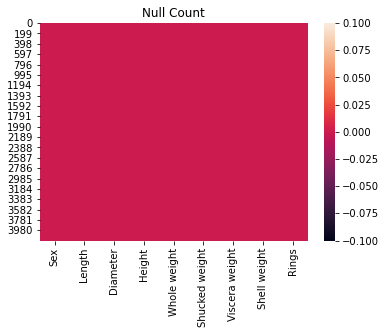

In [9]:
sns.heatmap(df.isnull())
plt.title("Null Count")
plt.show

In [10]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [11]:
# Above we can see sex is having "Object" which we need to encode however it is common sense that as we are predictiong age of Abalone then Sex will not make any contribution towards prediction so I will drop Sex column instead of encoding

In [12]:
df.drop(labels="Sex", axis=1, inplace=True)

In [13]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [14]:
print(df["Rings"].value_counts())

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64


<AxesSubplot:xlabel='Rings', ylabel='count'>

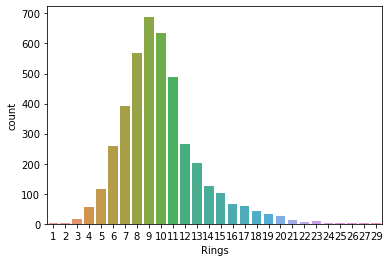

In [15]:
sns.countplot(x='Rings',data=df)

In [16]:
df.Rings.nunique()

28

As Per above observation we can see there are 28 outputs posiblities hence we will use linear regression model for this predication

<AxesSubplot:xlabel='Length', ylabel='Rings'>

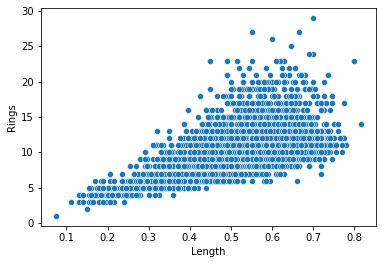

In [17]:
sns.scatterplot
sns.scatterplot(x="Length",y="Rings",data=df)

In [18]:
# We can see as Rings are increaseing when Length are increased. we have positive correlation in this case

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

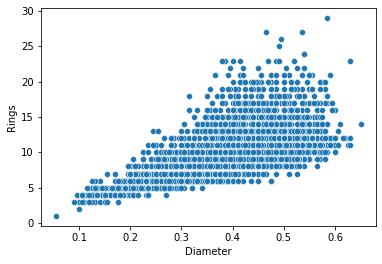

In [19]:
sns.scatterplot
sns.scatterplot(x="Diameter",y="Rings",data=df)

In [20]:
# Again we have positve correlation with Diameter as well

<AxesSubplot:xlabel='Height', ylabel='Rings'>

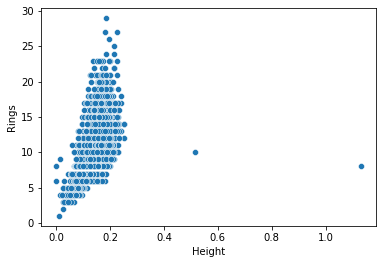

In [21]:
sns.scatterplot
sns.scatterplot(x="Height",y="Rings",data=df)

In [22]:
# we can see Height data is not much spreaded. All are mostly below 0.2 of range

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

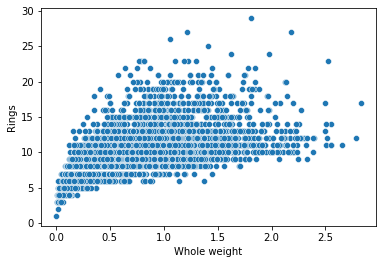

In [23]:
sns.scatterplot
sns.scatterplot(x="Whole weight",y="Rings",data=df)

In [24]:
# Positive correlation here

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

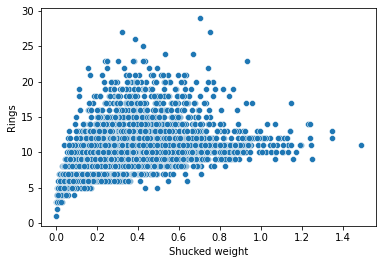

In [25]:
sns.scatterplot
sns.scatterplot(x="Shucked weight",y="Rings",data=df)

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

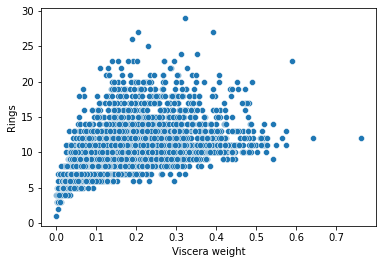

In [26]:
sns.scatterplot
sns.scatterplot(x="Viscera weight",y="Rings",data=df)

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

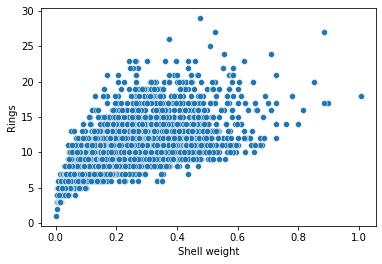

In [27]:
sns.scatterplot
sns.scatterplot(x="Shell weight",y="Rings",data=df)

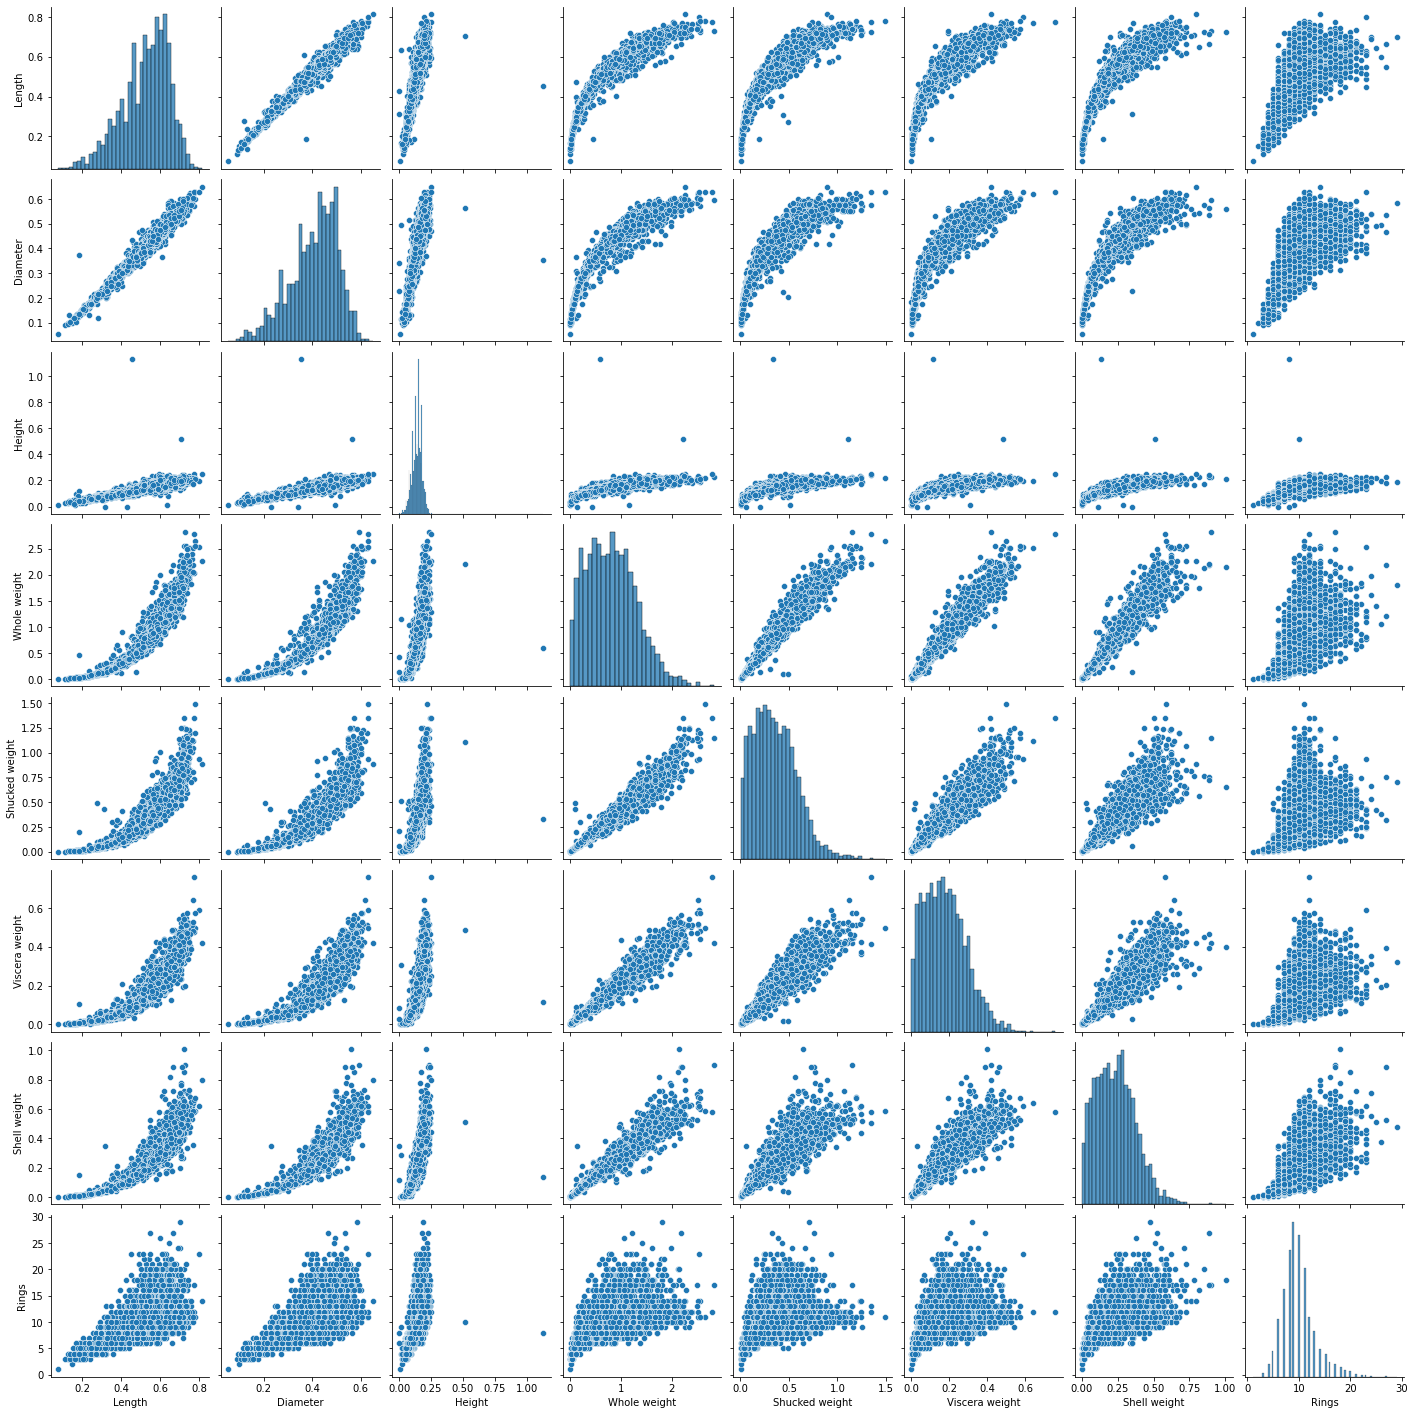

In [28]:
sns.pairplot(df)

In [29]:
#  We can identify easily that almost all independant features has positve ralation with label.

In [30]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

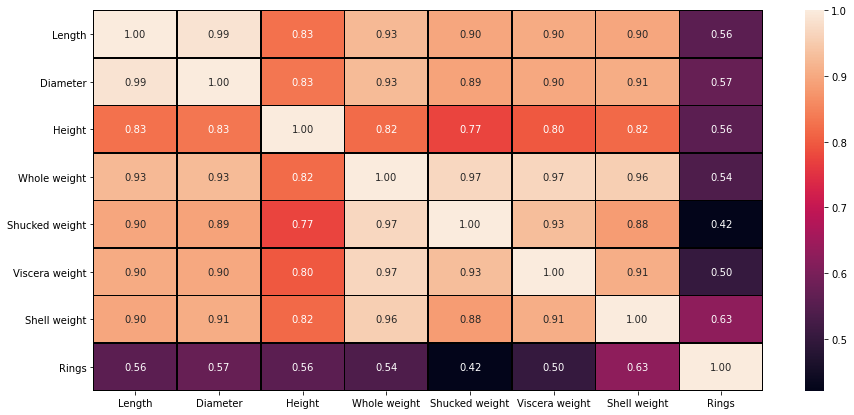

In [31]:
#Lets put on heatmap for better understanding

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.6,linecolor="black", fmt='.2f')

In [32]:
# From above map we got an idea that there is multicoliniarty present in data sent we can handle it before training model.

In [33]:
df.corr()['Rings'].sort_values()

Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [34]:
# Highly correlatated values are available and they are impacting label.

Length               AxesSubplot(0.125,0.536818;0.168478x0.343182)
Diameter          AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Height            AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Whole weight      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Shucked weight          AxesSubplot(0.125,0.125;0.168478x0.343182)
Viscera weight       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Shell weight         AxesSubplot(0.529348,0.125;0.168478x0.343182)
Rings                AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

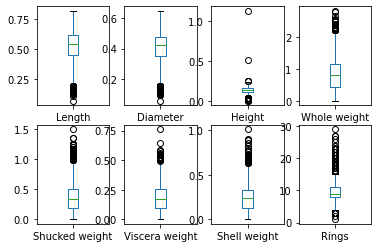

In [35]:
df.plot(kind='box',subplots=True,layout=(2,4))

In [36]:
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [37]:
col=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']

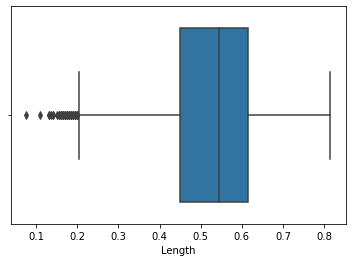

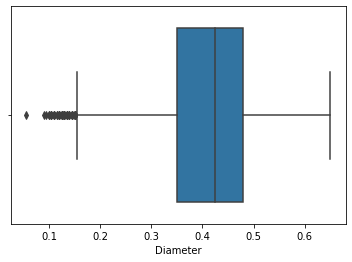

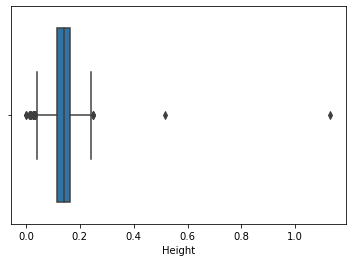

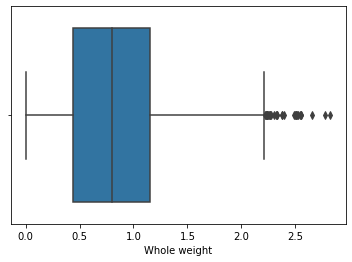

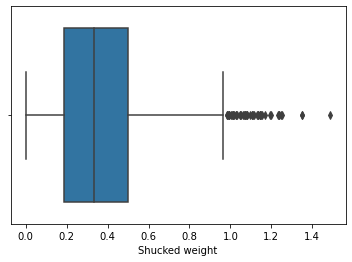

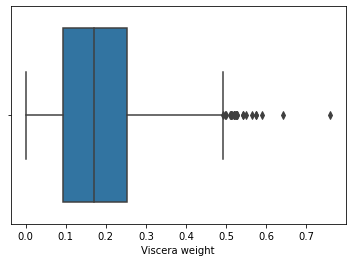

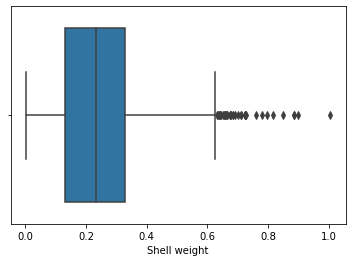

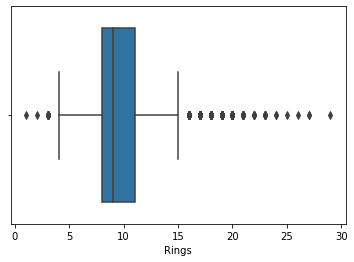

In [38]:
for i, col in enumerate(df[(col)]):
    plt.figure(i)
    sns.boxplot(df[col])

# Z score method to remove outliers

In [39]:
# taking 3 as threshold
from scipy.stats import zscore
zscore = zscore(df)
zabs = np.abs(zscore)

z = df[(zabs<3).all(axis=1)] 

In [40]:
z.shape

(4027, 8)

In [41]:
df.shape

(4177, 8)

In [42]:
# calculating Dataloss in the data set %

loss = (4174-4086)/4174*100
loss

2.1082894106372785

In [43]:
# 2% loss is acceptable

In [44]:
dropindex = df.index.difference(z.index)
dropindex

Int64Index([   6,   72,   81,   83,  129,  163,  164,  165,  166,  167,
            ...
            3899, 3902, 3924, 3930, 3944, 3961, 3962, 3996, 4145, 4148],
           dtype='int64', length=150)

In [45]:
df.drop(dropindex,inplace = True)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


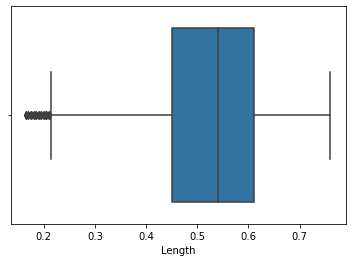

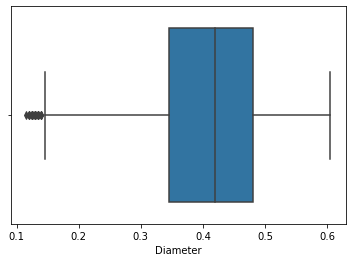

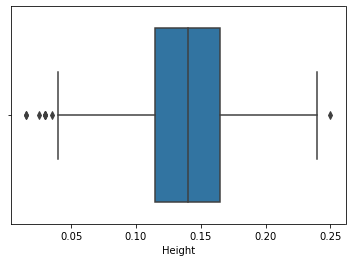

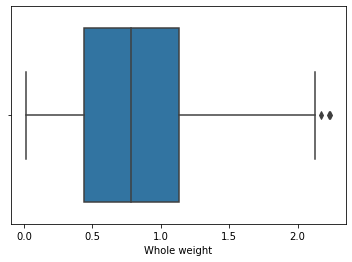

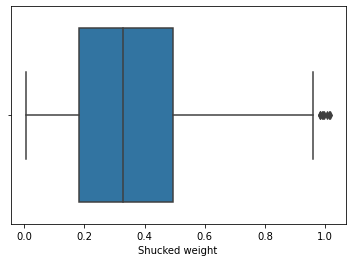

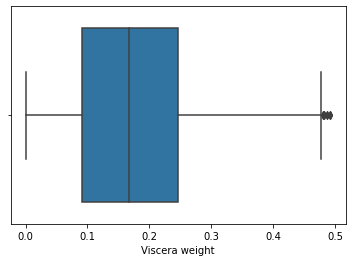

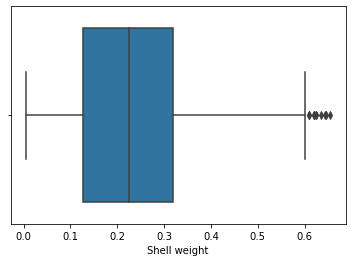

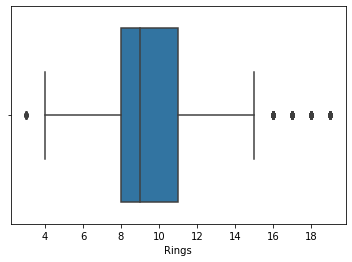

In [46]:
col2=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']

for i, col2 in enumerate(df[(col2)]):
    plt.figure(i)
    sns.boxplot(df[col2])

In [47]:
# We have removed outliers

In [48]:
#Lets check if we have skewness or not

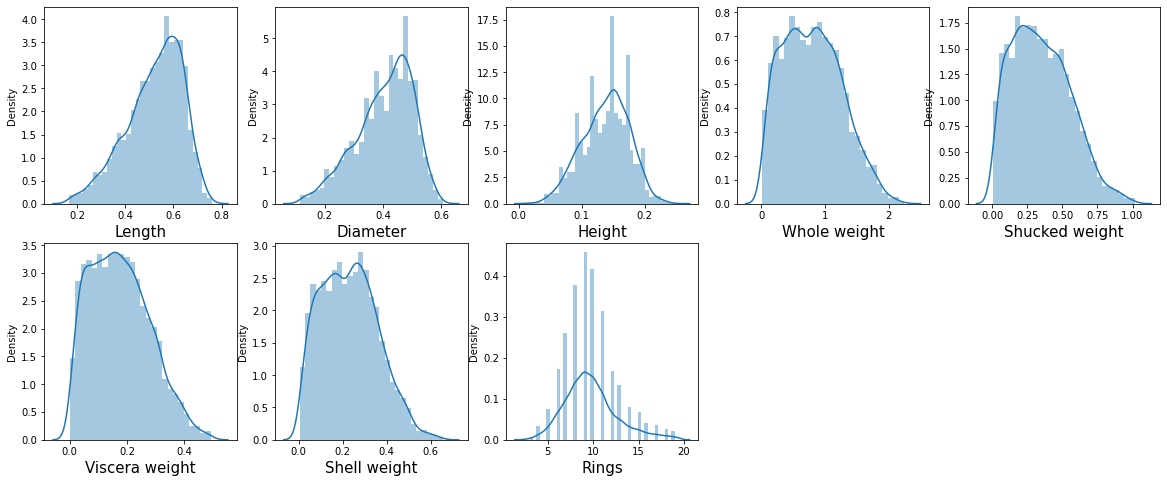

In [53]:


plt.figure(figsize=(20,21),facecolor='white')

plotn=1

for col in df:
    if plotn<=11:
        plt.subplot(5,5,plotn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
        
    plotn+=1   
    
plt.show() 

In [54]:
# We can see skewness in present in data set

In [56]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [57]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [58]:
x.shape

(4027, 7)

In [59]:
y.shape

(4027,)

In [62]:
df.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

Skewness Removal

In [71]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.68445079, -0.54337947, -1.15893308, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [-1.4117394 , -1.40113174, -1.28040611, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-0.0462191 ,  0.03716259, -0.12830502, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286, ...,  0.90189694,
         1.08965131,  0.66363183],
       [ 0.92606411,  0.8377131 ,  0.28606972, ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.9719402 ,  1.85550496,  1.62558351, ...,  2.31446634,
         1.73214622,  1.85675543]])

In [72]:
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [76]:
Columnsname=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']

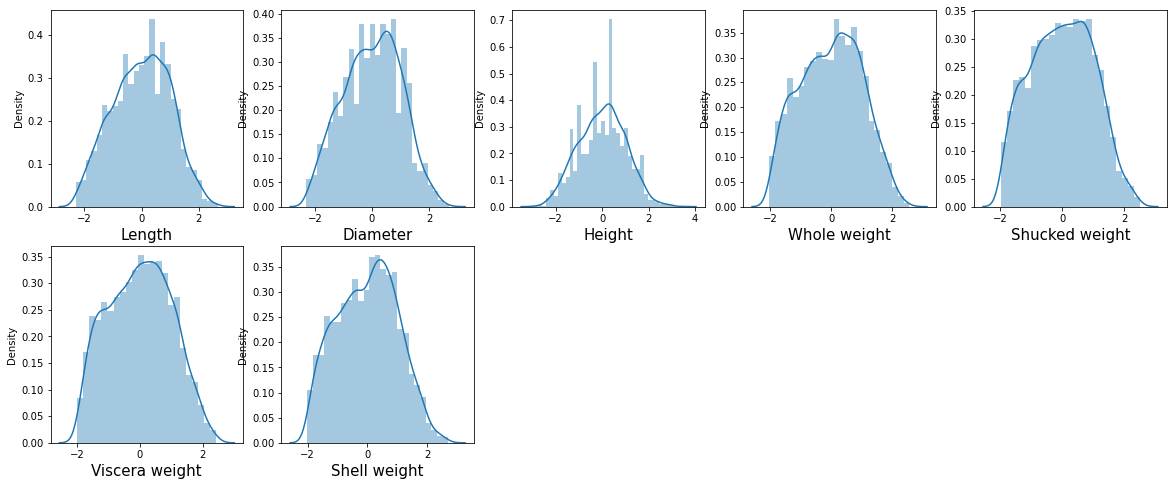

In [77]:
new_x=pd.DataFrame(data=x,columns=Columnsname)

plt.figure(figsize=(20,21),facecolor='white')

plotn=1

for col in new_x:
    if plotn<=7:
        plt.subplot(5,5,plotn)
        sns.distplot(new_x[col])
        plt.xlabel(col,fontsize=15)
        
    plotn+=1   
    
plt.show() 

In [78]:
# So we removed skewness

In [80]:
from sklearn.preprocessing import MinMaxScaler

m = MinMaxScaler()
m_m_scaled_x = m.fit_transform(x)
m_m_scaled_x

array([[0.32587672, 0.35159472, 0.27546358, ..., 0.3213402 , 0.29566722,
        0.30234124],
       [0.1798726 , 0.17972166, 0.25645617, ..., 0.1499004 , 0.14998212,
        0.14383372],
       [0.45400254, 0.46792148, 0.43673039, ..., 0.36098407, 0.39680716,
        0.40983173],
       ...,
       [0.59399609, 0.60192475, 0.76093544, ..., 0.6423811 , 0.69730051,
        0.56780466],
       [0.64918964, 0.62833268, 0.5015694 , ..., 0.64733347, 0.64912689,
        0.54951688],
       [0.8591506 , 0.83227385, 0.71116889, ..., 0.95670355, 0.84245984,
        0.82119212]])

In [81]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

In [82]:
# Adding value of 1.5 to every element of column "Rings" so that we get the age and adding new column age

age = y.add(1.5)
age

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Rings, Length: 4027, dtype: float64

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, Ridge
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [85]:
# Regression Model Building


x_train,x_test,y_train,y_test = train_test_split(m_m_scaled_x,age,test_size = .31, random_state = 1)
lr = LinearRegression()
rf = RandomForestRegressor()
sv = SVR()
r = Ridge()

In [86]:
# Traing all the models
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
sv.fit(x_train,y_train)
r.fit(x_train,y_train)

Ridge()

All models have been trained.

In [87]:
# Linear Regression Model

y_lr_pred = lr.predict(x_test)

# Checking R2 Score

print(" R2 Score of Linear Regression : ", r2_score(y_test,y_lr_pred))

# Checking mean squared error

print(" Mean squared error of Linear Regression : ", mean_squared_error(y_test,y_lr_pred))

 R2 Score of Linear Regression :  0.4911189412614849
 Mean squared error of Linear Regression :  4.118302612802171


In [88]:
# Ridge Regression Model

y_r_pred = r.predict(x_test)

# Checking R2 score

print(" R2 Score of Ridge Regression : ",r2_score(y_test,y_r_pred))

# Checking mean squared error

print(" Mean Squarred error of Ridge Regression : ",mean_squared_error(y_test,y_r_pred))

 R2 Score of Ridge Regression :  0.48817936552332286
 Mean Squarred error of Ridge Regression :  4.142092184520586


In [89]:
# Random Forest Regression Model

y_rf_pred = rf.predict(x_test)
# Checking R2 Score

print(" R2 Score of Random Forest Regression:", r2_score(y_test,y_rf_pred))

# checking mean squared error

print(" Mean Squarred error of Random Forest Regression:", mean_squared_error(y_test,y_rf_pred))

 R2 Score of Random Forest Regression: 0.5212140185940956
 Mean Squarred error of Random Forest Regression: 3.874747397918334


In [90]:
# Support Vector Regression Model

y_sv_pred = sv.predict(x_test)

# Checking R2 Score

print(" R2 Score of SVM Regression:",r2_score(y_test,y_sv_pred))

# checking mean squared error

print(" Mean squared error of SVM Regression:",mean_squared_error (y_test,y_sv_pred))

 R2 Score of SVM Regression: 0.5309178889155343
 Mean squared error of SVM Regression: 3.7962153444790854


Cross Validation Score

In [91]:
print("Linear Regression Model:",cross_val_score(lr,m_m_scaled_x,age,cv = ShuffleSplit(5)).mean())
print("Ridge Regression Model:",cross_val_score(r,m_m_scaled_x,age,cv = ShuffleSplit(5)).mean())
print("Random Forest Regression Model:",cross_val_score(rf,m_m_scaled_x,age,cv = ShuffleSplit(5)).mean())
print("SV Regression Model:",cross_val_score(sv,m_m_scaled_x,age,cv = ShuffleSplit(5)).mean())

Linear Regression Model: 0.5113104786839404
Ridge Regression Model: 0.5093469008986716
Random Forest Regression Model: 0.5105417879067982
SV Regression Model: 0.5308951943659083


Hyperparameter tuning

In [92]:
parameter = {'n_estimators':[30,60],
             'max_depth':[10,20,40],
             'min_samples_leaf':[5,10,20],
             'min_samples_split':[5,10],
             'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]}
Gridcv = GridSearchCV(RandomForestRegressor(),parameter, cv=5,n_jobs = -1,verbose = 1)
Gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.4min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60]},
             verbose=1)

In [94]:
Gridcv.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 60}

In [95]:
Best_mod = RandomForestRegressor(n_estimators = 60,criterion = 'mse',max_depth = 40,max_features = 'auto',min_samples_leaf = 10,min_samples_split = 10)
Best_mod.fit(x_train,y_train)

RandomForestRegressor(max_depth=40, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=60)

In [96]:
rf_pred = Best_mod.predict(x_test)
acc = r2_score(y_test,rf_pred)
print(acc*100)

53.1308131263447


In [97]:
# We got our highest performing model which is randomforest

In [98]:
import pickle

filename = 'AbaloneSVR.pkl'
pickle.dump(Best_mod,open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([12.51879522,  8.72357738, 15.12618782, ..., 11.90881587,
       10.27247153, 12.66341092])

In [99]:
# Load the Model
# Predicting some of the X_test results and matching it with true i.e. y_test values using Random Forest.

a = np.array(y_test)
predicted = np.array(Best_mod.predict(x_test))
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,13.5,12.518795
1,9.5,8.723577
2,10.5,15.126188
3,10.5,12.859331
4,19.5,14.663605
...,...,...
1244,9.5,10.500257
1245,12.5,11.253630
1246,11.5,11.908816
1247,8.5,10.272472
